In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


# Load Data

In [43]:
cars_data = pd.read_csv('Cardetails.csv')


In [44]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [45]:
cars_data.drop(columns=['torque'], inplace=True)

In [46]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [47]:
cars_data.shape

(8128, 12)

# Preprocessing

#NULL ChecK

In [48]:
cars_data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [49]:
cars_data.dropna(inplace=True)

In [50]:
cars_data.shape

(7907, 12)

#Duplicate Check

In [51]:
cars_data.duplicated().sum()

np.int64(1189)

In [52]:
cars_data.drop_duplicates(inplace=True)

In [53]:
cars_data.shape

(6718, 12)

In [54]:
cars_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0


In [55]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


#Data Analysis

In [56]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

In [57]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [58]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [59]:
get_brand_name('Maruti  Swift Dzire VDI')

'Maruti'

In [60]:
cars_data['name'] = cars_data['name'].apply(get_brand_name)

In [61]:
cars_data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [62]:
cars_data['mileage'] = cars_data['mileage'].apply(clean_data)

In [63]:
cars_data['max_power'] = cars_data['max_power'].apply(clean_data)

In [64]:
cars_data['engine'] = cars_data['engine'].apply(clean_data)

In [65]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique())
    print("======================")

Unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

In [66]:
cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                          ,inplace=True)

<ipython-input-66-56bf65aab98c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
<ipython-input-66-56bf65aab98c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['name'].replace(['Maruti', 'Skoda

In [67]:
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [68]:
cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)

<ipython-input-68-66fc237d138f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['transmission'].replace(['Manual', 'Automatic'],[1,2], inplace=True)
<ipython-input-68-66fc237d138f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['transmission'].replace(['Manual', 'Automatic'],[

In [69]:
cars_data['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [70]:
cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)

<ipython-input-70-9418936a2ba3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3], inplace=True)
<ipython-input-70-9418936a2ba3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['seller_type'].replace(['In

In [71]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.3+ KB


In [72]:
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [73]:
cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)

<ipython-input-73-84556209217c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4], inplace=True)
<ipython-input-73-84556209217c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['fuel'].replace(['Diesel', 'Petrol', 'LPG'

In [74]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [75]:
cars_data.reset_index(inplace=True)

In [76]:
cars_data


,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,1,2014,450000,145500,1,1,1,First Owner,23.40,1248.0,74.00,5.0
1,1,2,2014,370000,120000,1,1,1,Second Owner,21.14,1498.0,103.52,5.0
2,2,3,2006,158000,140000,2,1,1,Third Owner,17.70,1497.0,78.00,5.0
3,3,4,2010,225000,127000,1,1,1,First Owner,23.00,1396.0,90.00,5.0
4,4,1,2007,130000,120000,2,1,1,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,8121,1,2013,260000,50000,2,1,1,Second Owner,18.90,998.0,67.10,5.0
6714,8122,4,2014,475000,80000,1,1,1,Second Owner,22.54,1396.0,88.73,5.0
6715,8123,4,2013,320000,110000,2,1,1,First Owner,18.50,1197.0,82.85,5.0
6716,8124,4,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [77]:
cars_data['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [78]:
cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'],
                           [1,2,3,4,5], inplace=True)

<ipython-input-78-63eb4efac81c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner',
<ipython-input-78-63eb4efac81c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_data['owner'].replace(['First Owner', 'Second Owner', 'Thir

In [79]:
cars_data.drop(columns=['index'], inplace=True)

In [80]:
for col in cars_data.columns:
    print('------------')
    print(col)
    print(cars_data[col].unique())

------------
name
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
------------
year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
------------
selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000   290000
   455000   351000   535000   175000   565000   120000   725000   185000
   615000   270000   625000   866000   375000 

In [81]:
cars_data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


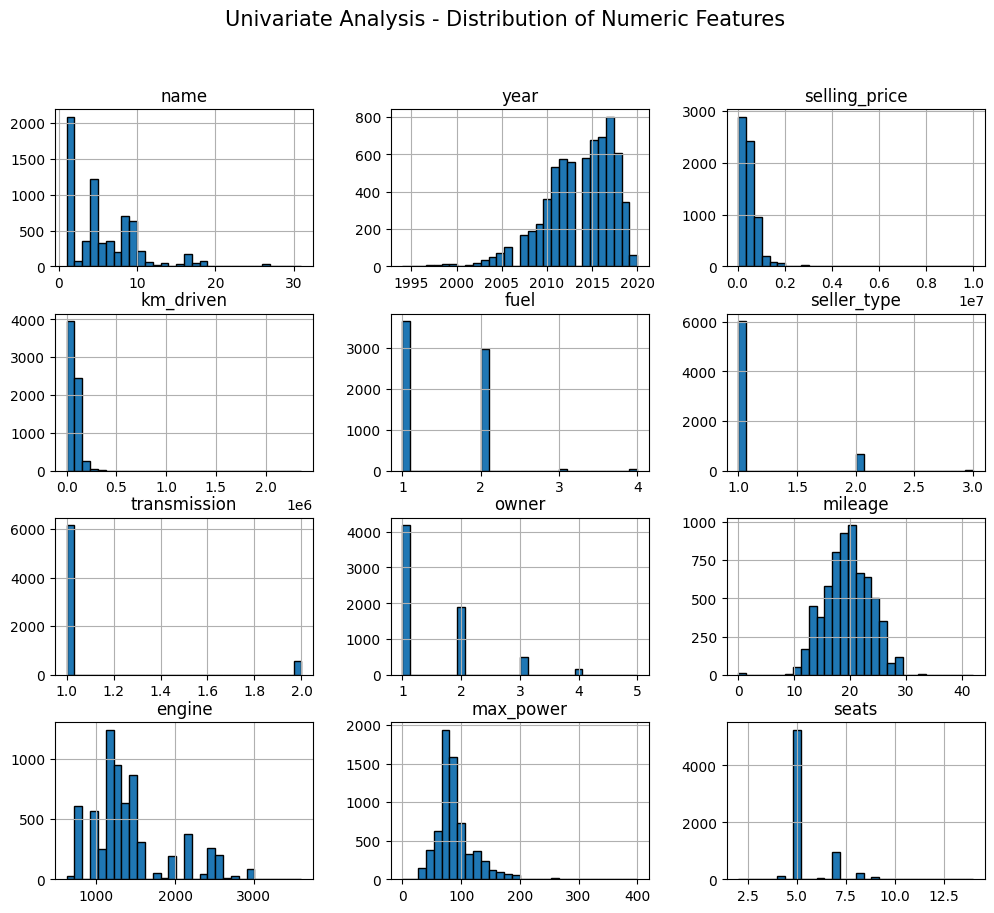

In [82]:
# Univariate Analysis (Histogram for Numeric Variables)
cars_data.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Univariate Analysis - Distribution of Numeric Features", fontsize=15)
plt.show()

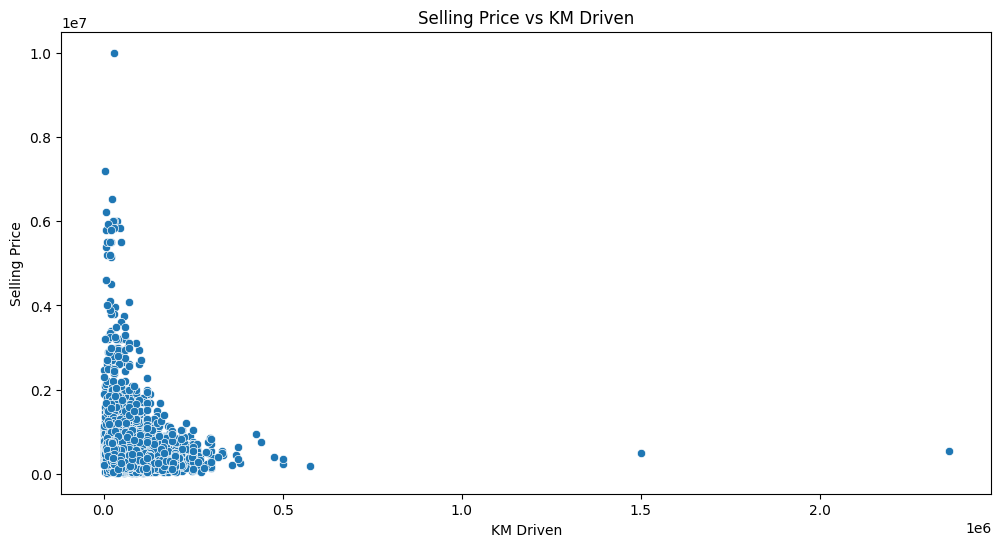

In [83]:
# Bivariate Analysis (Selling Price vs Other Features)
plt.figure(figsize=(12, 6))
sns.scatterplot(x=cars_data['km_driven'], y=cars_data['selling_price'])
plt.title("Selling Price vs KM Driven")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.show()

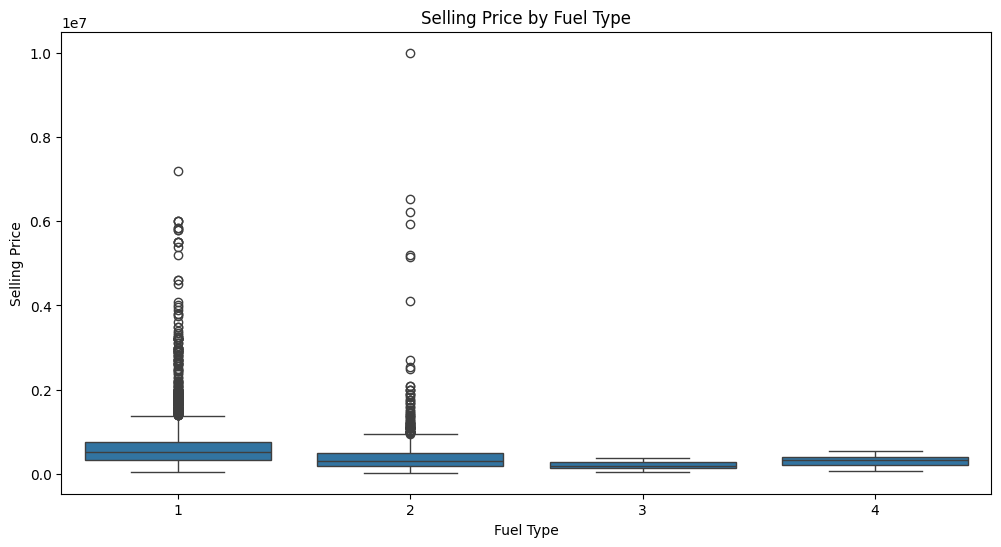

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=cars_data['fuel'], y=cars_data['selling_price'])
plt.title("Selling Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()

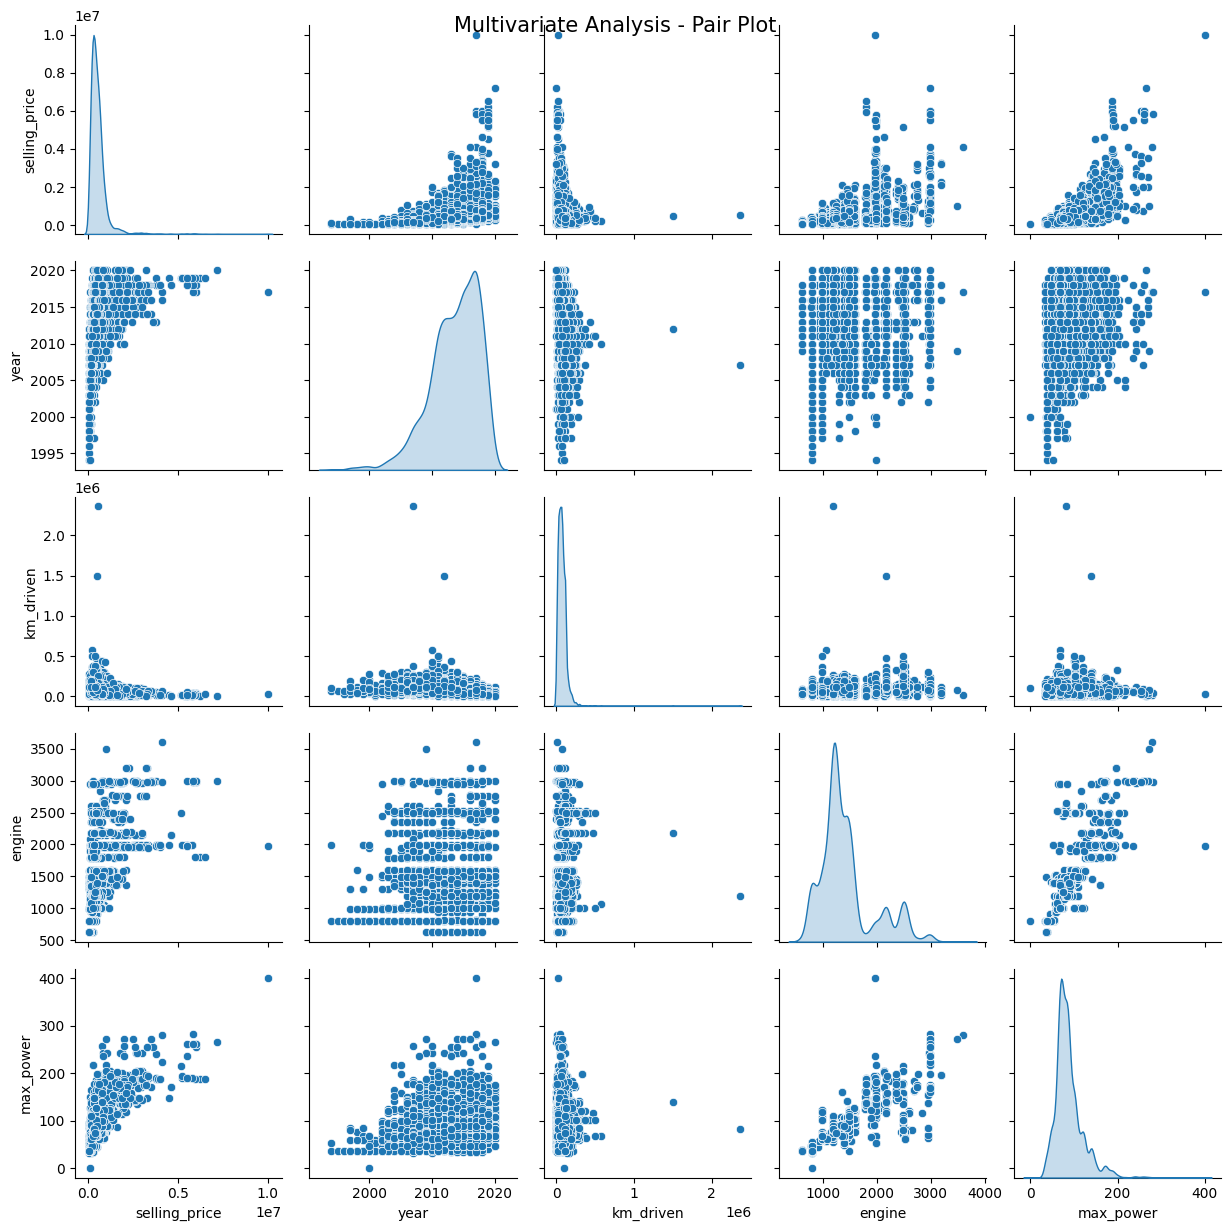

In [85]:
# Multivariate Analysis (Pair Plot for Key Features)
sns.pairplot(cars_data[['selling_price', 'year', 'km_driven', 'engine', 'max_power']], diag_kind='kde')
plt.suptitle("Multivariate Analysis - Pair Plot", fontsize=15)
plt.show()

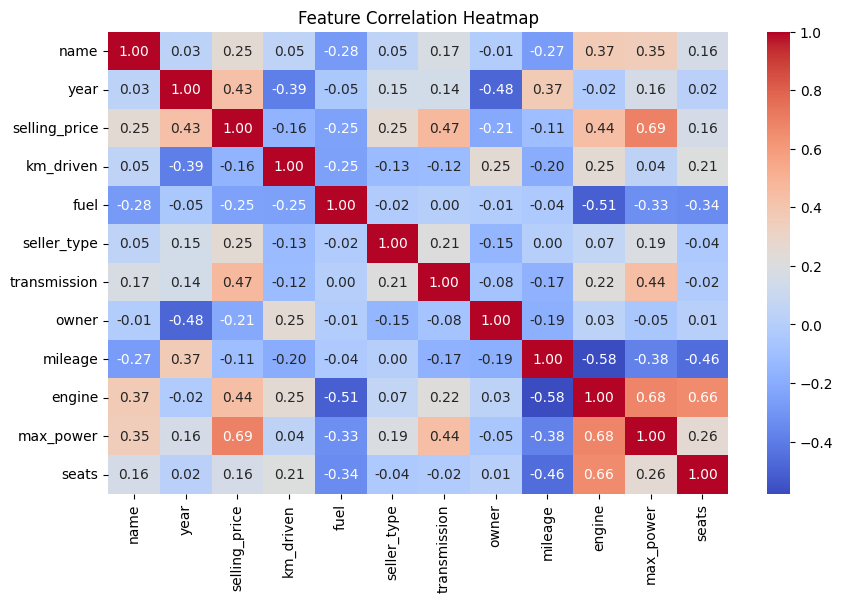

In [86]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cars_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [87]:
# Detecting Outliers using Z-Score
z_scores = np.abs(zscore(cars_data.select_dtypes(include=[np.number])))  # Only numeric columns
outliers = (z_scores > 3)
cars_data_no_outliers = cars_data[(~outliers).all(axis=1)]

print(f"Original Dataset Shape: {cars_data.shape}")
print(f"Dataset Shape After Outlier Removal: {cars_data_no_outliers.shape}")

Original Dataset Shape: (6718, 12)
Dataset Shape After Outlier Removal: (5641, 12)


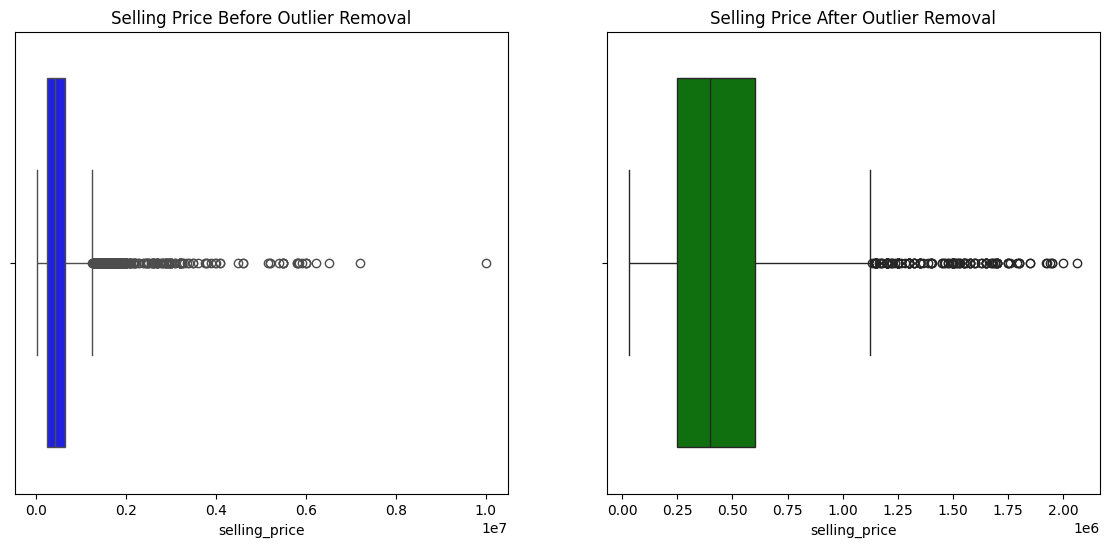

In [88]:
# Boxplots Before and After Outlier Handling
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=cars_data, x='selling_price', ax=ax[0], color='blue')
ax[0].set_title("Selling Price Before Outlier Removal")

sns.boxplot(data=cars_data_no_outliers, x='selling_price', ax=ax[1], color='green')
ax[1].set_title("Selling Price After Outlier Removal")

plt.show()

In [89]:
# Feature and Target Selection
input_data = cars_data.drop(columns=['selling_price'])
output_data = cars_data['selling_price']

In [90]:
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)



In [92]:
from sklearn.preprocessing import StandardScaler# Feature Scaling (using StandardScaler)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)  # Use transform, not fit_transform

In [93]:
# AI-Powered Model Selection and Hyperparameter Tuning
model = XGBRegressor(n_estimators=500,  # Increased n_estimators
                    learning_rate=0.05,  # Decreased learning_rate
                    max_depth=8,  # Increased max_depth
                    subsample=0.8,  # Added subsample
                    colsample_bytree=0.8,  # Added colsample_bytree
                    random_state=42)

In [94]:
# Train Model
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [95]:
# Predictions
predictions = model.predict(x_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 71803.8671875


In [96]:
# Testing Sample Prediction (Remember to scale the input data)
input_data_model = pd.DataFrame(
    [[5, 2022, 12000, 1, 1, 1, 1, 12.99, 2494.0, 100.6, 5.0]],
    columns=['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
)
input_data_model_scaled = scaler.transform(input_data_model)  # Scale the input data
predicted_price = model.predict(input_data_model_scaled)
print(f'Predicted Price: {predicted_price[0]}')



Predicted Price: 1055739.375


In [97]:
# Save Model
import pickle as pk

# Save the StandardScaler
pk.dump(scaler, open('scaler.pkl', 'wb'))